<h1 style='font-size: 40px; color: Crimson; font-family: Candara; font-weight: 600; text-align: center;'>🌸 Iris Flower Classifications: Machine Learning Projects 🌸</h1>

<h1 style='font-size: 20px; color: Crimson; font-family: Candara; font-weight: 600'>Import Required Libraries</h1>

In [141]:
# Data Preprocessing and Transformations
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from scipy.stats import skew, kurtosis 

# Machine Learning Algorithims
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# ML Model Evaluatioion
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Data manipulation and visualization
import matplotlib.pyplot as plt  
import seaborn as sns  
import pandas as pd  
import numpy as np 
import string
import math  
import re 

# Model Saving and Loading
import joblib

# Miscellaneous
import warnings  
warnings.simplefilter("ignore")  
pd.set_option('display.max_columns', 8) 
pd.set_option('display.float_format', lambda x: '%.2f' % x)  # Control floating-point display format

print("Libraries Loaded Successfully")

Libraries Loaded Successfully


<h1 style='font-size: 20px; color: crimson; font-family: Candara; font-weight: 600'>Import and Preprocessing Dataset</h1>

In [89]:
def loading_iris_data():
    from sklearn.datasets import load_iris
    iris = load_iris()
    X, y = iris.data, iris.target
    feature_names, target_names = iris.feature_names, iris.target_names

    Iris_dataset = pd.DataFrame(X, columns=feature_names)
    Iris_dataset['species'] = y
    Iris_dataset['species'] = Iris_dataset['species'].map({i: name for i, name in enumerate(target_names)})
    return Iris_dataset

df = loading_iris_data()
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.10,3.50,1.40,0.20,setosa
1,4.90,3.00,1.40,0.20,setosa
2,4.70,3.20,1.30,0.20,setosa
3,4.60,3.10,1.50,0.20,setosa
4,5.00,3.60,1.40,0.20,setosa


<h4 style='font-size: 18px; color: blue; font-family: Candara; font-weight: 600'>1.1: Dataset Informations/ Overview</h4>

In [90]:
df.shape

(150, 5)

In [91]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species'],
      dtype='object')

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


<h4 style='font-size: 18px; color: blue; font-family: Candara; font-weight: 600'>1.3: Columns Summary</h4>

In [93]:
def column_summary(df):
    summary_data = []
    
    for col_name in df.columns:
        col_dtype = df[col_name].dtype
        num_of_nulls = df[col_name].isnull().sum()
        num_of_non_nulls = df[col_name].notnull().sum()
        num_of_distinct_values = df[col_name].nunique()
        
        if num_of_distinct_values <= 10:
            distinct_values_counts = df[col_name].value_counts().to_dict()
        else:
            top_10_values_counts = df[col_name].value_counts().head(10).to_dict()
            distinct_values_counts = {k: v for k, v in sorted(top_10_values_counts.items(), key=lambda item: item[1], reverse=True)}

        summary_data.append({
            'col_name': col_name,
            'col_dtype': col_dtype,
            'num_of_nulls': num_of_nulls,
            'num_of_non_nulls': num_of_non_nulls,
            'num_of_distinct_values': num_of_distinct_values,
            'distinct_values_counts': distinct_values_counts
        })
    
    summary_df = pd.DataFrame(summary_data)
    return summary_df


summary_df = column_summary(df)
display(summary_df)

,col_name,col_dtype,num_of_nulls,num_of_non_nulls,num_of_distinct_values,distinct_values_counts
0,sepal length (cm),float64,0,150,35,"{5.0: 10, 5.1: 9, 6.3: 9, 5.7: 8, 6.7: 8, 5.8:..."
1,sepal width (cm),float64,0,150,23,"{3.0: 26, 2.8: 14, 3.2: 13, 3.4: 12, 3.1: 11, ..."
2,petal length (cm),float64,0,150,43,"{1.4: 13, 1.5: 13, 5.1: 8, 4.5: 8, 1.6: 7, 1.3..."
3,petal width (cm),float64,0,150,22,"{0.2: 29, 1.3: 13, 1.8: 12, 1.5: 12, 1.4: 8, 2..."
4,species,object,0,150,3,"{'setosa': 50, 'versicolor': 50, 'virginica': 50}"


<h4 style='font-size: 18px; color: Blue; font-family: Candara; font-weight: 600'>1.4: Checking Missing Values</h4>

In [94]:
def Missig_values_info(df):   
    isna_df = df.isna().sum().reset_index(name='Missing Values Counts')
    isna_df['Proportions (%)'] = isna_df['Missing Values Counts']/len(df)*100
    return isna_df
    
isna_df = Missig_values_info(df)
isna_df

,index,Missing Values Counts,Proportions (%)
0,sepal length (cm),0,0.00
1,sepal width (cm),0,0.00
2,petal length (cm),0,0.00
3,petal width (cm),0,0.00
4,species,0,0.00


<h4 style='font-size: 18px; color: Blue; font-family: Candara; font-weight: 600'>1.5: Handling Duplicates Values</h4>

In [95]:
df.duplicated().sum()

np.int64(1)

In [97]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

<h1 style='font-size: 20px; color: green; font-family: Candara; font-weight: 600'>2.0: Detection and Handling Outliers</h1>

An **outlier** is a data point that significantly deviates from the overall pattern of a dataset. It appears as an unusually high or low value compared to the majority of observations. Outliers can result from measurement errors, data entry mistakes, or natural variations within the data. Their presence can distort statistical analysis, affecting measures such as the mean, standard deviation, and machine learning models.  

To ensure data integrity and accurate insights, we need to **detect and handle outliers** appropriately. Detection methods include statistical approaches like the **Z-score**, **interquartile range (IQR)**, and **visual tools such as box plots and scatter plots**. Once identified, handling outliers involves assessing their impact and determining whether to retain, transform, or remove them based on the context and objective of the analysis.

<h4 style='font-size: 18px; color: blue; font-family: Candara; font-weight: 600'>2.1: Visualize Outliers Using Boxplots</h4>

Boxplots are a great way to visualize the distribution of data and identify outliers. Outliers are typically represented as individual points outside the "whiskers" of the boxplot.

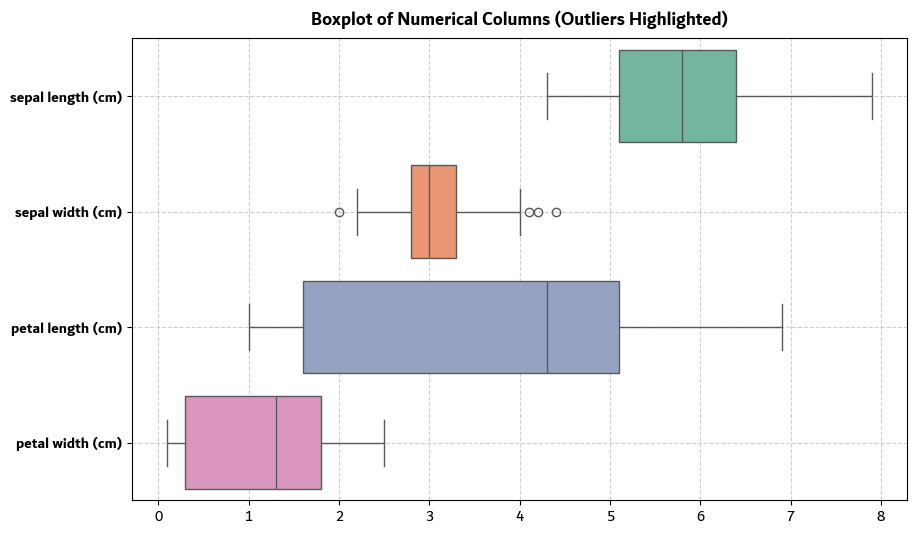

In [106]:
def visualize_outliers_boxplot(df):
    plt.rcParams.update({'font.family': 'Dubai', 'font.style': 'normal', 'font.size': 11 })
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, orient="h", palette="Set2")
    plt.title("Boxplot of Numerical Columns (Outliers Highlighted)", fontweight='bold', pad=10)
    plt.yticks(fontweight='bold')
    plt.grid(linestyle='--', alpha=0.6)
    plt.show()

visualize_outliers_boxplot(df)

<h4 style='font-size: 18px; color: blue; font-family: Candara; font-weight: 600'>2.2: Outliers Proportions in Dataset Using(IQR)</h4>

In [107]:
def detect_outliers_iqr(df):
    outlier_counts = {}
    outlier_percentages = {}
    
    for col in df.select_dtypes(include=[np.number]).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_counts[col] = len(outliers)
        outlier_percentages[col] = (len(outliers) / len(df)) * 100
    
    return pd.DataFrame({'Outlier Count': outlier_counts, 'Outlier Percentage (%)': outlier_percentages})
outlier_df = detect_outliers_iqr(df)
outlier_df

,Outlier Count,Outlier Percentage (%)
sepal length (cm),0,0.00
sepal width (cm),4,2.68
petal length (cm),0,0.00
petal width (cm),0,0.00


<h3 style='font-size: 18px; color: blue; font-family: Candara; font-weight: 600'>2.3: Handling Outliers (Treating outliers)</h3>

In this analysis, to handle outliers effectively, we will use **IQR-Based Capping**. The Interquartile Range (IQR) is the range between the 25th percentile (Q1) and the 75th percentile (Q3) of a dataset, representing the middle 50% of the data. Outliers are defined as values that fall outside the bounds of $( Q1 - 1.5 \times IQR )$ (lower bound) or $( Q3 + 1.5 \times IQR )$ (upper bound). Any data points falling outside these thresholds will be considered outliers. Instead of removing these outliers, we will cap them at the corresponding thresholds, ensuring they do not distort the analysis. This method is beneficial because it reduces the impact of extreme values without losing valuable data, making it especially useful when preserving the dataset's integrity is important for subsequent analysis or modeling. By applying IQR-based capping, we can maintain the dataset’s overall structure while ensuring that outliers do not disproportionately influence the results.

In [108]:
def cap_floor_outliers(df):
    for col in df.select_dtypes(include=[np.number]).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Cap and floor outliers
        df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
        df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    return df

df = cap_floor_outliers(df)
outlier_df = detect_outliers_iqr(df)
outlier_df

,Outlier Count,Outlier Percentage (%)
sepal length (cm),0,0.00
sepal width (cm),0,0.00
petal length (cm),0,0.00
petal width (cm),0,0.00


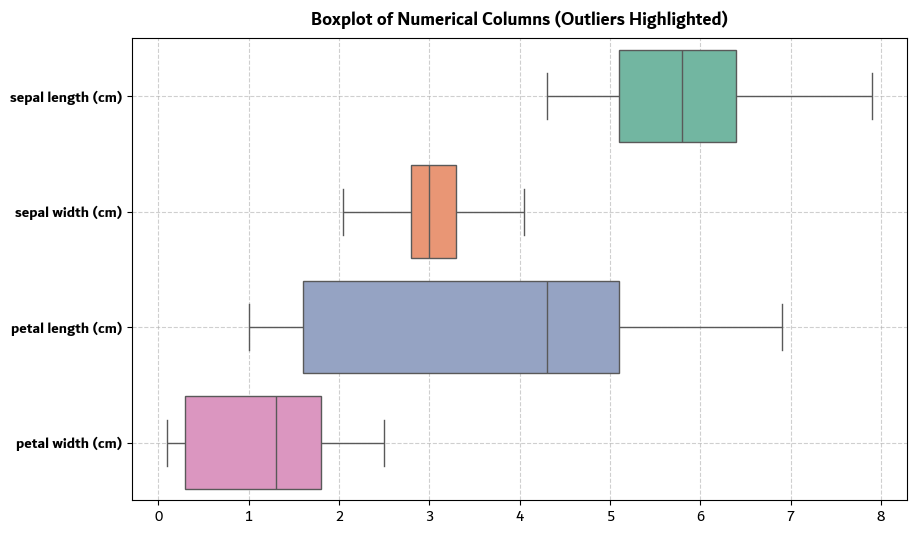

In [109]:
visualize_outliers_boxplot(df)

<h1 style='font-size: 22px; color: Green; font-family: Candara; font-weight: 600'>3.0: Statistic Description of The Datasets</h1>

Let's take a moment to quickly explore some essential statistics of our dataset. By using the `describe()` function in pandas, we can generate a summary of key metrics for each numerical column in the dataset. This gives us a bird's-eye view of the data, helping us understand the general distribution and characteristics of the values.

In [111]:
summary_stats = df.describe()
summary_stats

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,149.00,149.00,149.00,149.00
mean,5.84,3.06,3.75,1.19
std,0.83,0.43,1.77,0.76
min,4.30,2.05,1.00,0.10
25%,5.10,2.80,1.60,0.30
50%,5.80,3.00,4.30,1.30
75%,6.40,3.30,5.10,1.80
max,7.90,4.05,6.90,2.50


<h4 style='font-size: 18px; color: blue; font-family: Candara; font-weight: 600'>3.1:  Distribution of Continuous variables</h4>

Let’s explore the distribution of continuous variables in our dataset by examining key statistics. The **Mean** gives us the average value, while the **Median** provides the middle value, offering a more robust measure against outliers. The **Mode** identifies the most frequent value. **Standard Deviation** and **Variance** show how much the data deviates from the mean, with larger values indicating greater spread. The **Range** reveals the difference between the maximum and minimum values, while **Skewness** measures the symmetry of the distribution. Lastly, **Kurtosis** tells us about the presence of outliers by analyzing the "tailedness" of the distribution. Together, these metrics give us a comprehensive view of how the data is distributed and guide us in identifying any potential issues like skewness or outliers.

In [114]:
def compute_overall_distribution_stats(df):
    results = []
    for col in df.select_dtypes(include=[np.number]).columns:
        mean = df[col].mean()
        median = df[col].median()
        mode = df[col].mode().iloc[0] if not df[col].mode().empty else np.nan
        std_dev = df[col].std()
        variance = df[col].var()
        value_range = df[col].max() - df[col].min()
        skewness_val = skew(df[col], nan_policy='omit')  # Skewness
        kurtosis_val = kurtosis(df[col], nan_policy='omit')  # Kurtosis


        results.append({
            'Parameter': col,
            'Mean': mean,
            'Median': median,
            'Mode': mode,
            'Standard Deviation': std_dev,
            'Variance': variance,
            'Range': value_range,
            'Skewness': skewness_val,
            'Kurtosis': kurtosis_val
        })

    
    result_df = pd.DataFrame(results)
    return result_df

Continuous_variables_distribution = compute_overall_distribution_stats(df)
Continuous_variables_distribution

,Parameter,Mean,Median,Mode,...,Variance,Range,Skewness,Kurtosis
0,sepal length (cm),5.84,5.80,5.00,...,0.69,3.60,0.31,-0.59
1,sepal width (cm),3.06,3.00,3.00,...,0.18,2.00,0.18,-0.20
2,petal length (cm),3.75,4.30,1.40,...,3.13,5.90,-0.26,-1.40
3,petal width (cm),1.19,1.30,0.20,...,0.58,2.40,-0.09,-1.34


<h4 style='font-size: 18px; color: Blue; font-family: Candara; font-weight: 600'>3.2: Group-wise Distribution of Continuous variables</h4>

The function below computes these statistics for each numerical column in the dataset, grouped by the values in the specified `group_column`. The result is returned in a DataFrame where each row corresponds to a group and contains the calculated statistics for each numerical column. This function is useful for analyzing how the distribution of data varies across different groups within a dataset.

In [115]:
def compute_group_distribution_stats(df, group_column):
    results = []
    grouped = df.groupby(group_column)
    for col in df.select_dtypes(include=[np.number]).columns:
        if col != group_column:
            for group_name, group_data in grouped:
                mean = group_data[col].mean()
                median = group_data[col].median()
                mode = group_data[col].mode().iloc[0] if not group_data[col].mode().empty else np.nan
                std_dev = group_data[col].std()
                variance = group_data[col].var()
                cv = group_data[col].std() / group_data[col].mean() * 100  # Coefficient of Variation
                value_range = group_data[col].max() - group_data[col].min()
                
        
                skewness_val = skew(group_data[col], nan_policy='omit')  # Skewness
                kurtosis_val = kurtosis(group_data[col], nan_policy='omit')  # Kurtosis
                
                
                n = len(group_data[col])  # Sample size
                sem = std_dev / np.sqrt(n) if n > 1 else np.nan  # Standard error of the mean

                # Append the results to the list
                results.append({
                    group_column: group_name,
                    'Variables': col,
                    'Mean': mean,
                    'SEM': sem,
                    'Median': median,
                    'Mode': mode,
                    'Standard Deviation': std_dev,
                    'Variance': variance,
                    'Coefficient of Variation': cv,
                    'Range': value_range,
                    'Skewness': skewness_val,
                    'Kurtosis': kurtosis_val,
                })

    result_df = pd.DataFrame(results)
    return result_df

group_column = 'species'
Group_wise_continuous_variables_distribution = compute_group_distribution_stats(df, group_column)
Group_wise_continuous_variables_distribution.head(15)

,species,Variables,Mean,SEM,...,Coefficient of Variation,Range,Skewness,Kurtosis
0,setosa,sepal length (cm),5.01,0.05,...,7.04,1.50,0.12,-0.35
1,versicolor,sepal length (cm),5.94,0.07,...,8.70,2.10,0.10,-0.60
2,virginica,sepal length (cm),6.60,0.09,...,9.57,3.00,0.08,-0.02
3,setosa,sepal width (cm),3.42,0.05,...,10.41,1.75,-0.30,0.48
4,versicolor,sepal width (cm),2.77,0.04,...,11.24,1.35,-0.31,-0.55
5,virginica,sepal width (cm),2.98,0.05,...,10.85,1.60,0.32,0.52
6,setosa,petal length (cm),1.46,0.02,...,11.88,0.90,0.10,0.80
7,versicolor,petal length (cm),4.26,0.07,...,11.03,2.10,-0.59,-0.07
8,virginica,petal length (cm),5.56,0.08,...,9.96,2.40,0.50,-0.28
9,setosa,petal width (cm),0.25,0.01,...,42.84,0.50,1.22,1.43


<h4 style='font-size: 18px; color: Blue; font-family: Candara; font-weight: 600'>3.3: Distributions of Categorical Variables</h4>

Now, let’s explore the counts and proportions of categorical variables, both individually and across different groups. Counts indicate how frequently each category appears, providing insight into the overall distribution. Proportions, on the other hand, show the relative frequency of each category compared to the total, helping to identify balance or imbalance. Examining these aspects across groups can reveal patterns and relationships that may be important for further analysis. This exploration is essential for understanding the structure and distribution of categorical variables.

In [116]:
def Distributions_of_Categorical_Variables(df, categories):
    data = []
    for category in categories:
        counts = df[category].value_counts()
        proportions = df[category].value_counts(normalize=True)
        for value, count in counts.items():
            proportion = proportions[value]
            data.append({
                'Category': category,
                'Value': value,
                'Count': count,
                'Proportion': f"{proportion:.2%}" 
            })
    
    result_df = pd.DataFrame(data)
    return result_df

categories = df.select_dtypes(include=['object']).columns
Distributions_of_Categorical_Variables = Distributions_of_Categorical_Variables(df, categories)
Distributions_of_Categorical_Variables

,Category,Value,Count,Proportion
0,species,setosa,50,33.56%
1,species,versicolor,50,33.56%
2,species,virginica,49,32.89%


<h4 style='font-size: 18px; color: Blue; font-family: Candara; font-weight: 600'>3.4: Comparing the Means of Variables Across Different Groups</h4>


Now, let’s turn our attention to comparing the means of variables across different specified groups. This approach helps us understand how each variable behaves within various categories or groups. For instance, we might explore how the average outcome of a variable changes across different practices or conditions. Such comparisons allow us to identify any significant differences between groups, uncovering patterns or trends that could be crucial for deeper analysis. By analyzing these mean comparisons, we gain valuable insights into the relationships between variables and groups, which can inform decisions or guide further investigations.

In [118]:
def summary_stats(df, group=''):
    Metrics = df.select_dtypes(include=np.number).columns.tolist()
    df_without_location = df.drop(columns=[group])
    grand_mean = df_without_location[Metrics].mean()
    sem = df_without_location[Metrics].sem()
    cv = df_without_location[Metrics].std() / df_without_location[Metrics].mean() * 100
    grouped = df.groupby(group)[Metrics].agg(['mean', 'sem']).reset_index()
    
    summary_df = pd.DataFrame()
    for col in Metrics:
        summary_df[col] = grouped.apply(
            lambda x: f"{x[(col, 'mean')]:.2f} ± {x[(col, 'sem')]:.2f}", axis=1
        )
    
    summary_df.insert(0, group, grouped[group])
    grand_mean_row = ['Grand Mean'] + grand_mean.tolist()
    sem_row = ['SEM'] + sem.tolist()
    cv_row = ['%CV'] + cv.tolist()
    
    summary_df.loc[len(summary_df)] = grand_mean_row
    summary_df.loc[len(summary_df)] = sem_row
    summary_df.loc[len(summary_df)] = cv_row
    
    return summary_df


Treatmentstats_df = summary_stats(df, group='species')
Treatmentstats_df

,species,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,setosa,5.01 ± 0.05,3.42 ± 0.05,1.46 ± 0.02,0.25 ± 0.01
1,versicolor,5.94 ± 0.07,2.77 ± 0.04,4.26 ± 0.07,1.33 ± 0.03
2,virginica,6.60 ± 0.09,2.98 ± 0.05,5.56 ± 0.08,2.03 ± 0.04
3,Grand Mean,5.84,3.06,3.75,1.19
4,SEM,0.07,0.03,0.14,0.06
5,%CV,14.22,13.93,47.15,63.84


<h1 style='font-size: 20px; color: Green; font-family: Candara; font-weight: 600'>4.0: Exploration of Data Distribution (Visualizations)</h1>

Visualizing data distributions is a crucial step in understanding the underlying structure, patterns, and characteristics of your dataset. Lets use Seaborn's distplot to explore the distribution of continuous numerical variables. A distplot helps visualize how data is spread out, showing us the frequency and shape of distributions.

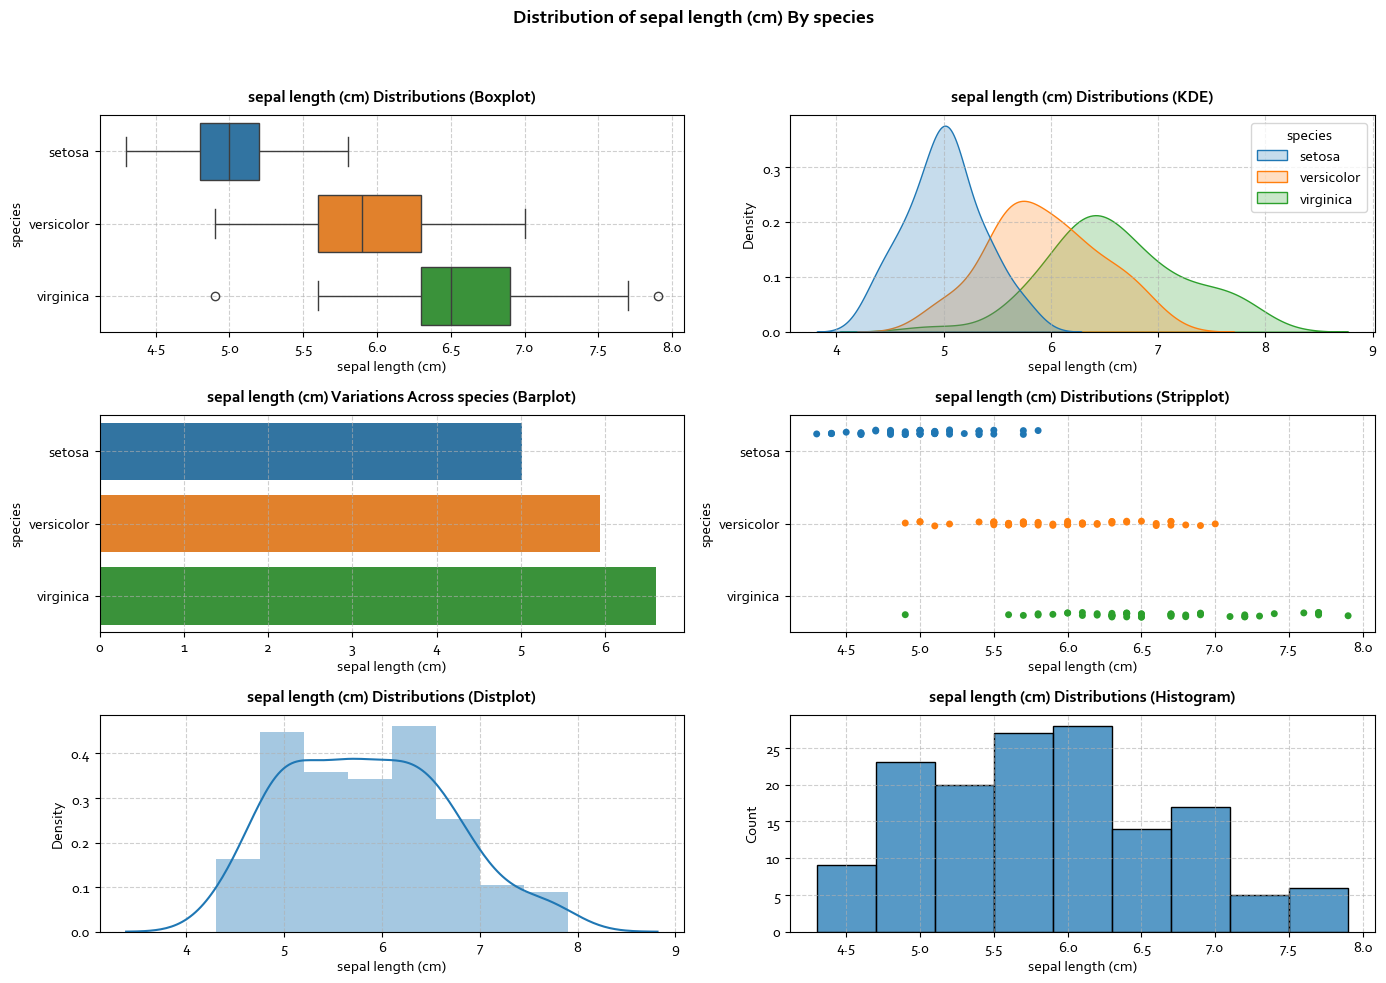

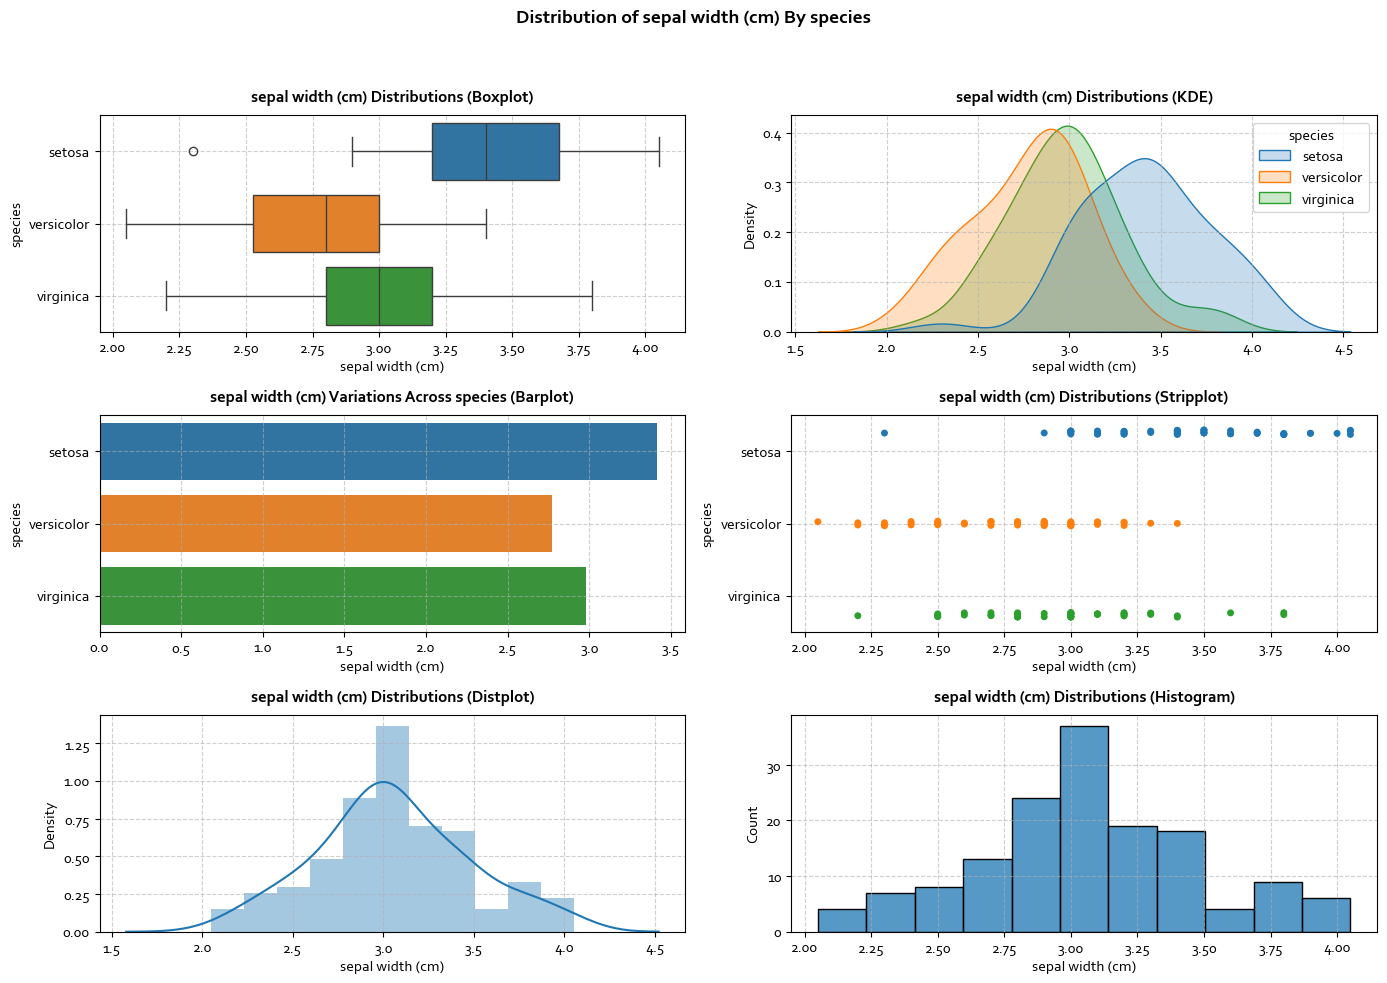

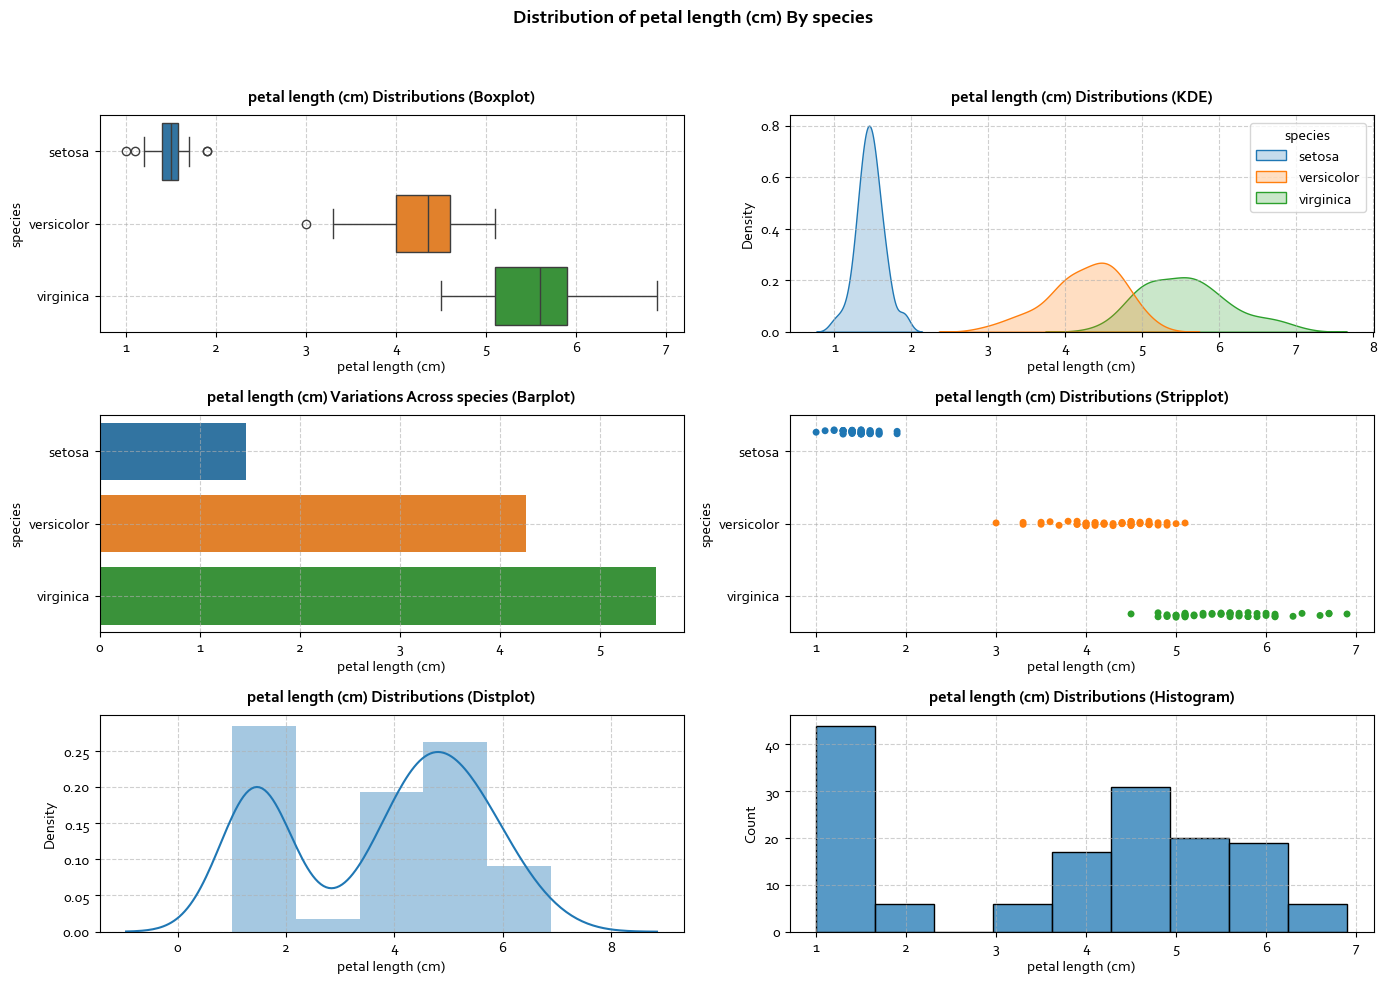

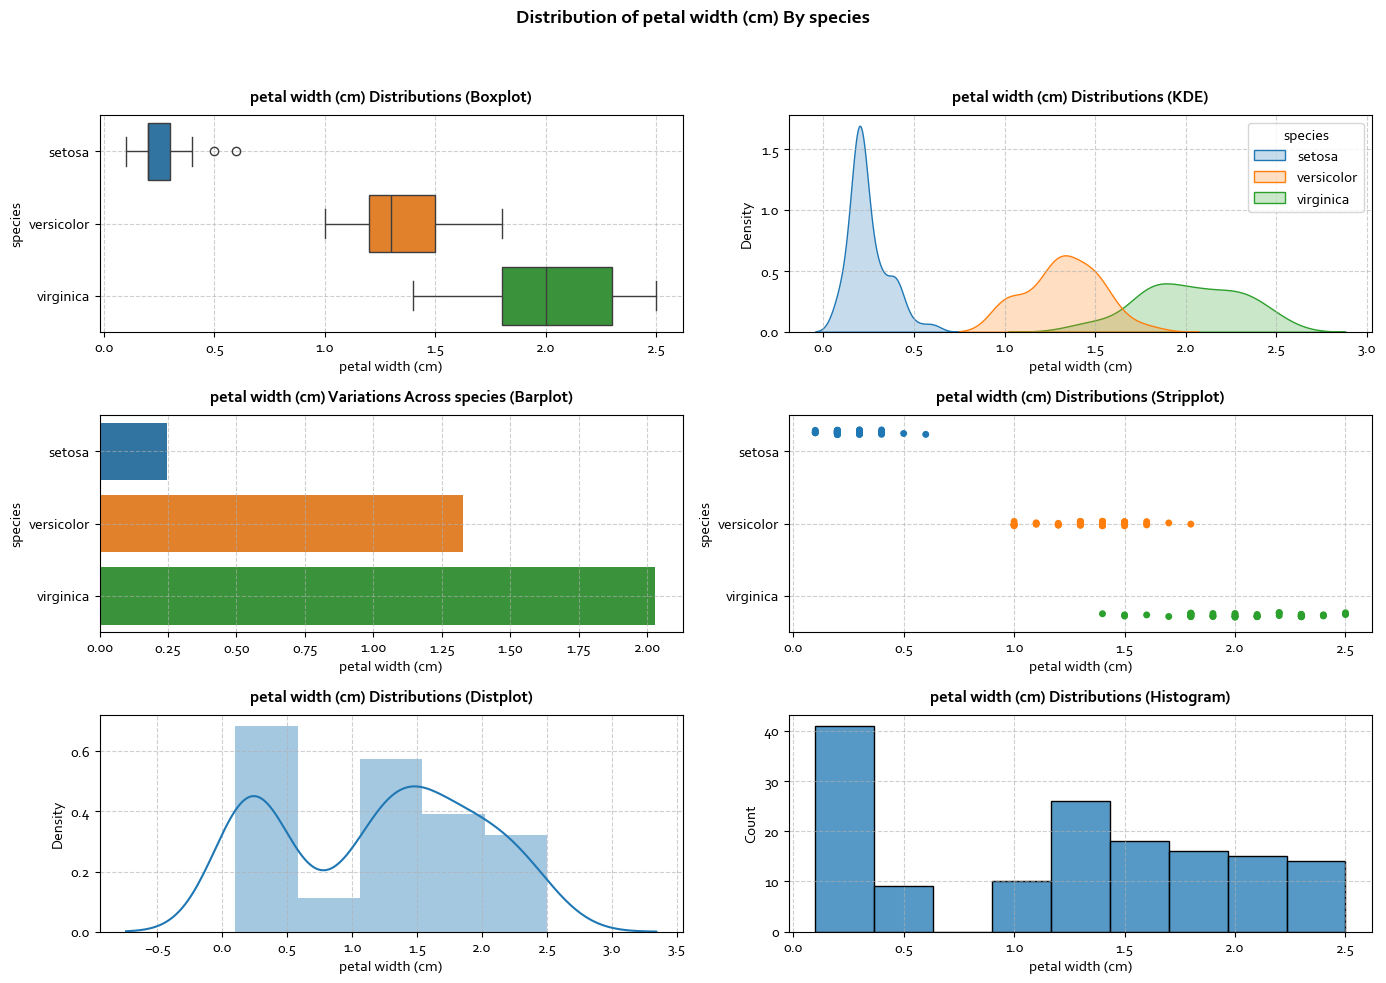

In [119]:
def set_plot_style():
    plt.rcParams.update({'font.family': 'Corbel', 'font.style': 'normal', 'font.size': 11})

def create_subplots(title):
    fig, axes = plt.subplots(3, 2, figsize=(14, 10))
    fig.suptitle(title, fontsize=14, fontweight='bold')
    return fig, axes

def plot(df, column, axes, group):
    sns.boxplot(data=df, x=column, y=df[group], ax=axes[0, 0], hue=df[group])
    axes[0, 0].set_title(f"{column} Distributions (Boxplot)", fontsize=12, fontweight='bold', pad=10)
    axes[0, 0].set_xlabel(column)
    axes[0, 0].grid(linestyle='--', alpha=0.6)

    sns.kdeplot(data=df, x=column, ax=axes[0, 1], hue=df[group], fill=True)
    axes[0, 1].set_title(f"{column} Distributions (KDE)", fontsize=12, fontweight='bold', pad=10)
    axes[0, 1].set_xlabel(column)
    axes[0, 1].grid(linestyle='--', alpha=0.6)

    sns.barplot(data=df, x=column, y=df[group], ax=axes[1, 0], errorbar=None, hue=df[group])
    axes[1, 0].set_title(f"{column} Variations Across {group} (Barplot)", fontsize=12, fontweight='bold', pad=10)
    axes[1, 0].set_xlabel(column)
    axes[1, 0].grid(linestyle='--', alpha=0.6)

    sns.stripplot(data=df, x=column, y=df[group], ax=axes[1, 1], hue=df[group], dodge=True)
    axes[1, 1].set_title(f"{column} Distributions (Stripplot)", fontsize=12, fontweight='bold', pad=10)
    axes[1, 1].set_xlabel(column)
    axes[1, 1].grid(linestyle='--', alpha=0.6)

    sns.distplot(df[column], ax=axes[2, 0], kde=True)
    axes[2, 0].set_title(f"{column} Distributions (Distplot)", fontsize=12, fontweight='bold', pad=10)
    axes[2, 0].set_xlabel(column)
    axes[2, 0].grid(linestyle='--', alpha=0.6)

    sns.histplot(data=df, x=column, ax=axes[2, 1])
    axes[2, 1].set_title(f"{column} Distributions (Histogram)", fontsize=12, fontweight='bold', pad=10)
    axes[2, 1].set_xlabel(column)
    axes[2, 1].grid(linestyle='--', alpha=0.6)

def generate_plots(df, metrics, group=''):
    set_plot_style()
    for column in metrics:
        fig, axes = create_subplots(f'Distribution of {column} By {group}')
        plot(df, column, axes, group)
        plt.tight_layout(rect=[0, 0, 1, 0.95])
        plt.show()

Metrics = df.select_dtypes(include=np.number).columns.tolist()
generate_plots(df,  Metrics, group='species')

<h1 style='font-size: 20px; color: Green; font-family: Candara; font-weight: 600'>5.0: Correllation Analysis</h1>

<h3 style='font-size: 18px; color: Blue; font-family: Candara; font-weight: 600'>5.1: Correlation Coefficients </h3>

In [120]:
def compute_correlation_matrix(df, method="pearson", visualize=True):
    if method not in ['pearson', 'spearman', 'kendall']:
        raise ValueError("Invalid method. Choose from 'pearson', 'spearman', or 'kendall'.")
    
    numeric_df = df.select_dtypes(include=['number'])
    corr_matrix = numeric_df.corr(method=method)
    
    return corr_matrix


correlation_matrix = compute_correlation_matrix(df, method="pearson")
correlation_matrix

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.00,-0.12,0.87,0.82
sepal width (cm),-0.12,1.00,-0.43,-0.36
petal length (cm),0.87,-0.43,1.00,0.96
petal width (cm),0.82,-0.36,0.96,1.00


<h3 style='font-size: 18px; color: blue; font-family: Candara; font-weight: 600'>5.2: Correlation Coefficients Heatmap </h3>

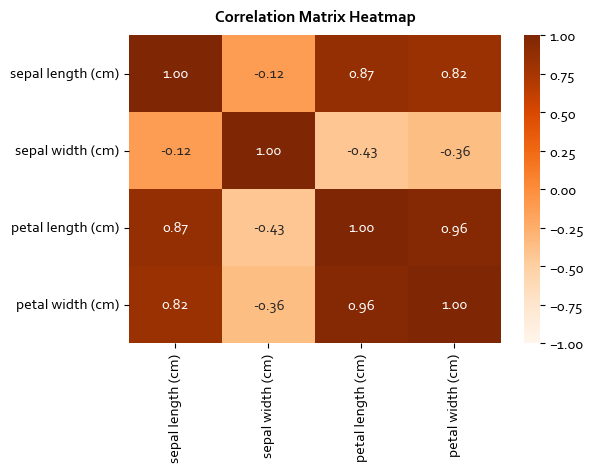

In [121]:
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='Oranges', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap', fontsize=12, fontweight='bold', pad=10)
plt.grid(False)
plt.show()

<h3 style='font-size: 18px; color: blue; font-family: candara; font-weight: 600'>5.3: Pearson’s</h3>

**Pearson’s r**: This measures the strength and direction of the linear relationship between two continuous variables. Values range from -1 to 1, with 0 indicating no relationship, 1 indicating a perfect positive relationship, and -1 indicating a perfect negative relationship.

In [123]:
from scipy.stats import pearsonr
def compute_pearson_r(df):
    numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
    results = []

    for i, col1 in enumerate(numerical_columns):
        for col2 in numerical_columns[i+1:]:
            r_value, p_value = pearsonr(df[col1], df[col2])
            direction = ("Positive" if r_value > 0 else 
                         "Negative" if r_value < 0 else "No correlation")
            strength = ("Strong" if abs(r_value) >= 0.7 else 
                        "Moderate" if abs(r_value) >= 0.3 else "Weak")

            results.append({
                'Variable 1': col1, 'Variable 2': col2,
                'Pearson\'s r': r_value, 'P-value': p_value,
                'Direction': direction, 'Strength': strength
            })
    
    return pd.DataFrame(results)

pearson_results_df = compute_pearson_r(df)
pearson_results_df

,Variable 1,Variable 2,Pearson's r,P-value,Direction,Strength
0,sepal length (cm),sepal width (cm),-0.12,0.15,Negative,Weak
1,sepal length (cm),petal length (cm),0.87,0.00,Positive,Strong
2,sepal length (cm),petal width (cm),0.82,0.00,Positive,Strong
3,sepal width (cm),petal length (cm),-0.43,0.00,Negative,Moderate
4,sepal width (cm),petal width (cm),-0.36,0.00,Negative,Moderate
5,petal length (cm),petal width (cm),0.96,0.00,Positive,Strong


<h3 style='font-size: 18px; color: Blue; font-family: Candara; font-weight: 600'>5.4: Relationship Between Parameters (Scatter Plot Matrix of All Variables)</h3>

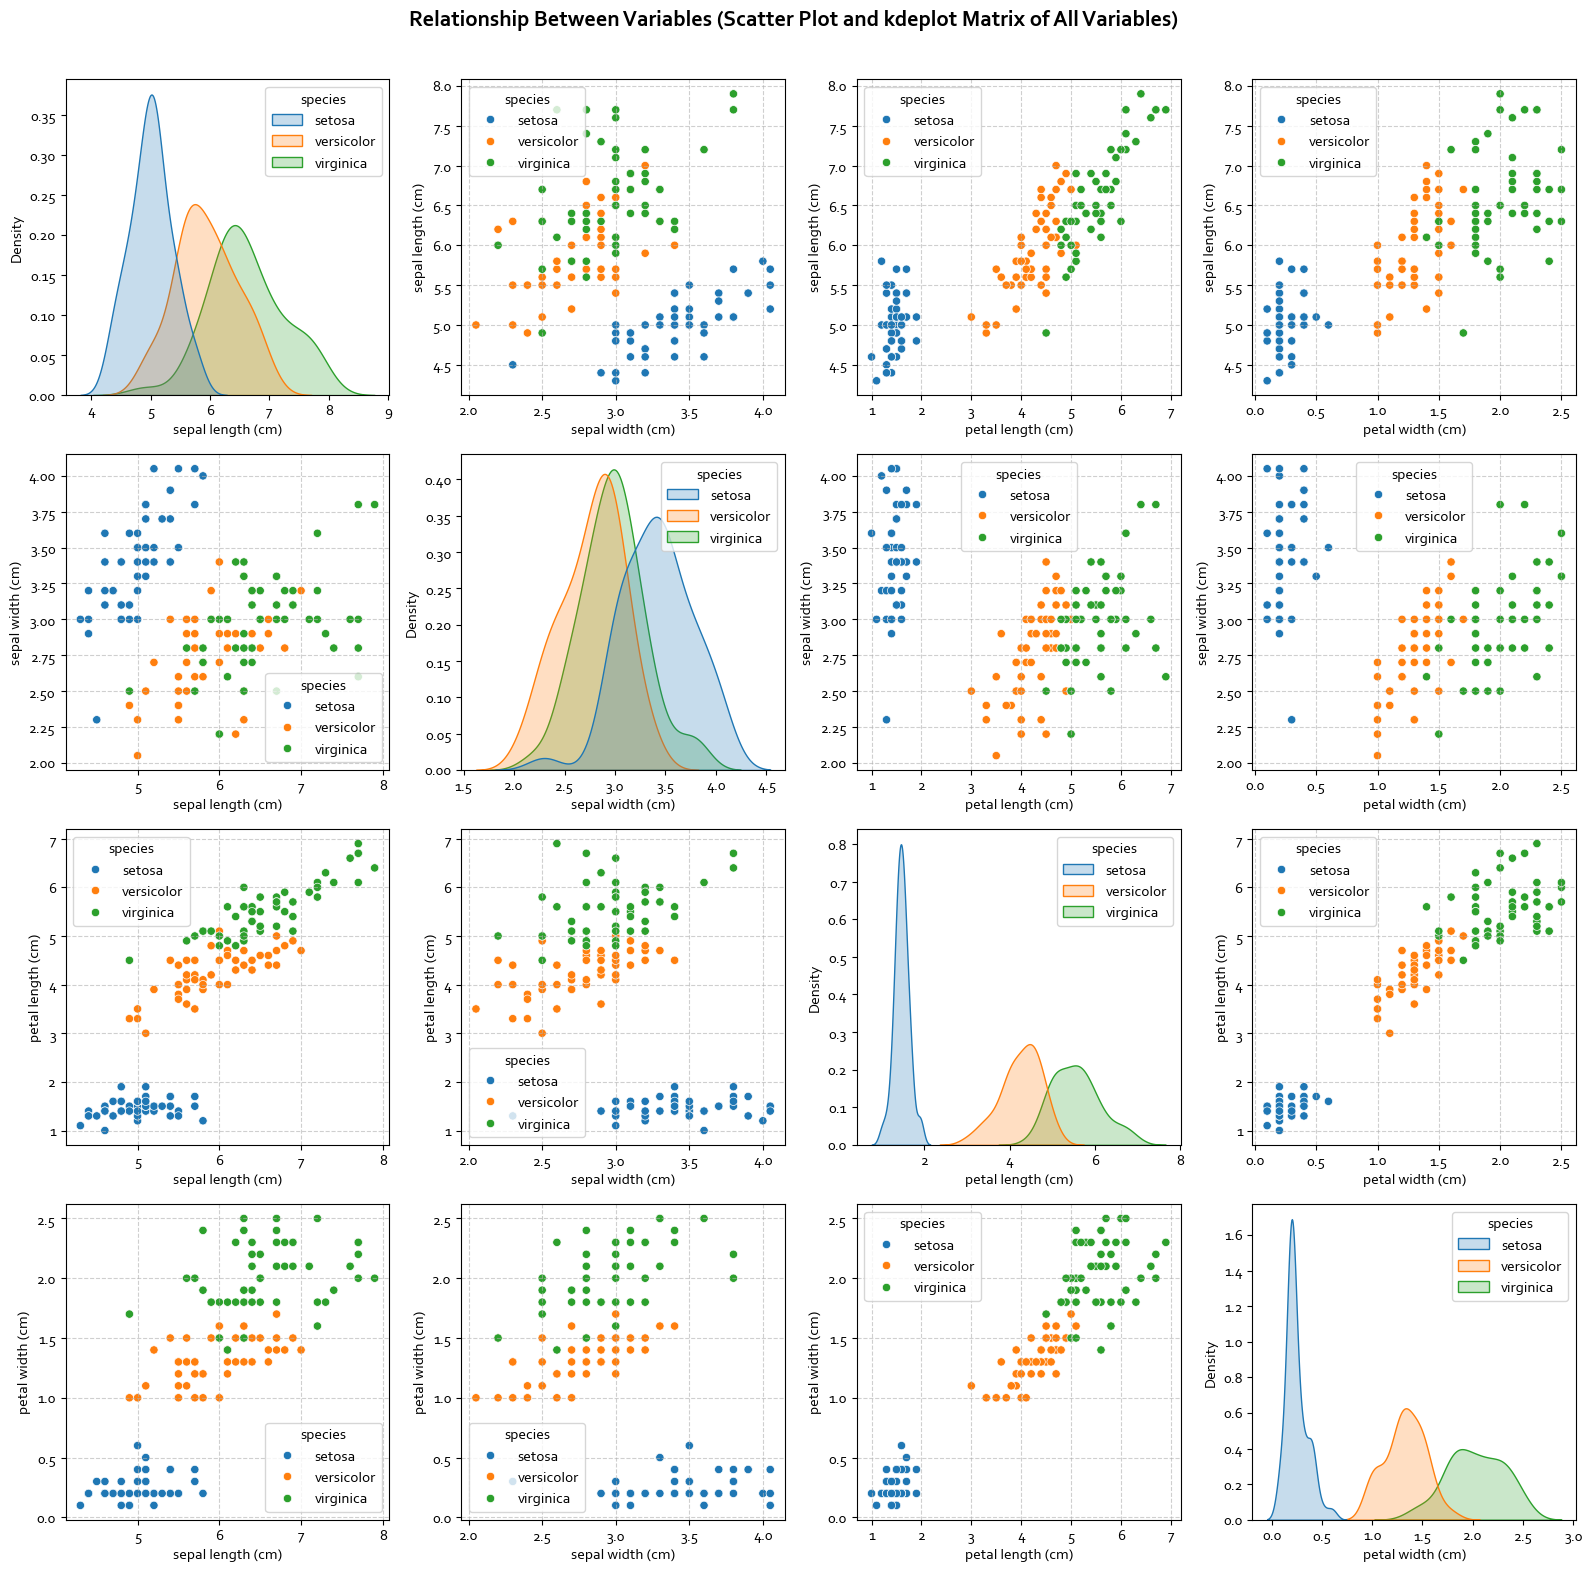

In [126]:
num_variables = len(Metrics)
rows = num_variables 
cols = num_variables

fig, axes = plt.subplots(rows, cols, figsize=(4 * cols, 4 * rows))
fig.suptitle('Relationship Between Variables (Scatter Plot and kdeplot Matrix of All Variables)', fontsize=16, fontweight='bold')

for i in range(num_variables):
    for j in range(num_variables):
        ax = axes[i, j]
        if i == j:
            sns.kdeplot(data=df, x=df[Metrics[j]], ax=ax, fill=True, hue='species')
            ax.set_xlabel(Metrics[j], fontsize=11)
            ax.set_ylabel('Density', fontsize=11)
        else:
            sns.scatterplot(data=df, x=df[Metrics[j]], y=df[Metrics[i]], ax=ax, hue='species', alpha=1)
            ax.set_xlabel(Metrics[j], fontsize=11)
            ax.set_ylabel(Metrics[i], fontsize=11)
            ax.grid(linestyle='--', alpha=0.6)

for i in range(num_variables):
    for j in range(num_variables):
        if i == j:
            axes[i, j].axis('on')

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

<h1 style='font-size: 20px; color: green; font-family: Candara; font-weight: 600'>6.0: Machine Learning Model Development</h1>

<h4 style='font-size: 18px; color: Blue; font-family: Candara; font-weight: 600'>6.1:  Feature Selection (Predictors and Target)</h4>

In [127]:
X = df.drop(columns=['species'])
y = df['species']

print(f'Predictor columns: {X.columns}')
print(f'Target column: Species')

Predictor columns: Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')
Target column: Species


<h4 style='font-size: 18px; color: Blue; font-family: Candara; font-weight: 600'>6.2: Split the Data into Training and Testing Sets</h4>

In [128]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display information about the training and testing sets
print(f'X_train data has {X_train.shape[0]} rows and {X_train.shape[1]} columns.')
print(f'X_test data has {X_test.shape[0]} rows and {X_test.shape[1]} columns.')
print(f'y_train data has {y_train.shape[0]} rows.')
print(f'y_test data has {y_test.shape[0]} rows.')

X_train data has 119 rows and 4 columns.
X_test data has 30 rows and 4 columns.
y_train data has 119 rows.
y_test data has 30 rows.


<h4 style='font-size: 18px; color: blue; font-family: Candara; font-weight: 600'>6.3: Features Preprocessing Pipeline</h4>

In [129]:
# Identify numerical and categorical features
numerical_features = X.select_dtypes(include=["float64", "int64"]).columns
categorical_features = X.select_dtypes(include=["object"]).columns

# Preprocessing pipelines
numerical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),  # Handle missing values
    ("scaler", StandardScaler())])                  # Scale numerical features


categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),   # Handle missing categorical values
    ("onehot", OneHotEncoder(handle_unknown="ignore"))      # Encode categorical features
])

# Combine preprocessors into a ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ("num", numerical_transformer, numerical_features),
    ("cat", categorical_transformer, categorical_features)
])

preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 Index([], dtype='object'))])

<h4 style='font-size: 18px; color: Blue; font-family: Candara; font-weight: 600'>6.4: Models Selection and Training</h4>

In [142]:
models = {
        "Logistic Regression": LogisticRegression(),
        "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
        "Support Vector Machine": SVC(),
        "Decision Tree": DecisionTreeClassifier(),
        "K-Nearest Neighbors": KNeighborsClassifier(),
        "Naive Bayes": GaussianNB()
    }

def train_models(X_train, y_train, models):
    trained_models = {}
    for name, model in models.items():
        pipeline = Pipeline(steps=[('preprocessor', preprocessor),('classifier', model) ])
        pipeline.fit(X_train, y_train)
        trained_models[name] = model
    
    return trained_models


trained_models = train_models(X_train, y_train, models)
trained_models

{'Logistic Regression': LogisticRegression(),
 'Random Forest': RandomForestClassifier(random_state=42),
 'Support Vector Machine': SVC(),
 'Decision Tree': DecisionTreeClassifier(),
 'K-Nearest Neighbors': KNeighborsClassifier(),
 'Naive Bayes': GaussianNB()}

<h4 style='font-size: 18px; color: Blue; font-family: Candara; font-weight: 600'>6.5: Model Performances Evaluation</h4>

In [143]:
def evaluate_models(trained_models, X_test, y_test):
    results = []
    
    for name, model in trained_models.items():
        pipeline = Pipeline(steps=[('preprocessor', preprocessor),('classifier', model) ])
        y_pred = pipeline.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred, output_dict=True)
        results.append({
            "Model": name,
            "Accuracy": accuracy,
            "Precision": report["weighted avg"]["precision"],
            "Recall": report["weighted avg"]["recall"],
            "F1-score": report["weighted avg"]["f1-score"]
        })
    
    return pd.DataFrame(results)

evaluation_metrics = evaluate_models(trained_models, X_test, y_test)
evaluation_metrics

,Model,Accuracy,Precision,Recall,F1-score
0,Logistic Regression,1.00,1.00,1.00,1.00
1,Random Forest,1.00,1.00,1.00,1.00
2,Support Vector Machine,1.00,1.00,1.00,1.00
3,Decision Tree,1.00,1.00,1.00,1.00
4,K-Nearest Neighbors,1.00,1.00,1.00,1.00
5,Naive Bayes,1.00,1.00,1.00,1.00


<h4 style='font-size: 18px; color: Blue; font-family: Candara; font-weight: 600'>6.6: Models Confusion Matrices</h4>

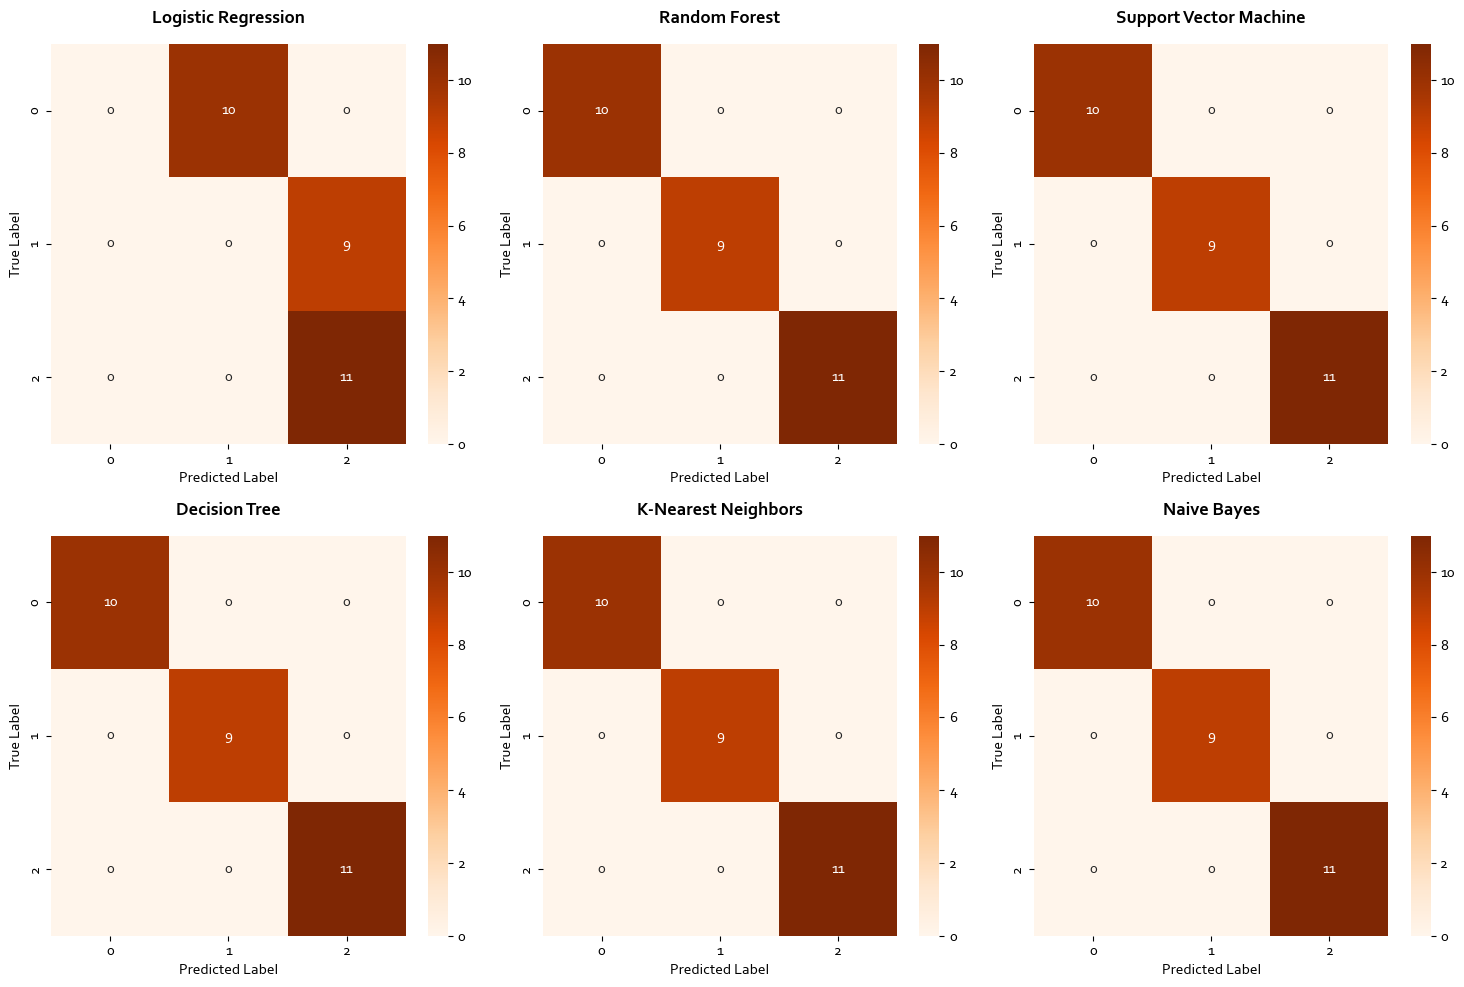

In [136]:
# Plot Confusion Matrices
def plot_confusion_matrices(trained_models, X_test, y_test):
    fig, axes = plt.subplots(2, 3, figsize=(5*3, 5*2))
    axes = axes.ravel()
    
    for i, (name, model) in enumerate(trained_models.items()):
        y_pred = model.predict(X_test)
        cm = confusion_matrix(y_test, y_pred)
        
        sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', ax=axes[i])
        axes[i].set_title(name, pad=15, fontweight='bold')
        axes[i].set_xlabel('Predicted Label')
        axes[i].set_ylabel('True Label')
    
    plt.tight_layout()
    plt.show()
    
plot_confusion_matrices(trained_models, X_test, y_test)

<h4 style='font-size: 18px; color: Blue; font-family: Candara; font-weight: 600'>6.7: Best Performing Model</h4>

In [137]:
def best_model(evaluation_metrics, criteria='Accuracy'):
    best_model_name = evaluation_metrics.loc[evaluation_metrics[criteria].idxmax(), 'Model']
    best_model = models[best_model_name]
    
    best_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', best_model)])
    best_pipeline.fit(X, y)
    
    print(f"{'*'*130}")
    print(f" {' '*50} Best model ({best_model_name})")
    print(f"{'*'*130}")
    
    return best_pipeline

best_model(evaluation_metrics, criteria='Accuracy')

**********************************************************************************************************************************
                                                    Best model (Random Forest)
**********************************************************************************************************************************


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index([], dtype='object'))])),
                ('classifier', RandomForestClassifier(random_state=42))])

<h4 style='font-size: 18px; color: Blue; font-family: Candara; font-weight: 600'>6.8: Models Classification Report</h4>

In [138]:
def model_classification_report(evaluation_metrics, X_test, y_test, criteria='Accuracy'):
    best_model_name = evaluation_metrics.loc[evaluation_metrics[criteria].idxmax(), 'Model']
    best_model = models[best_model_name]
    best_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', best_model)])
    y_pred = best_pipeline.predict(X_test)
    report = classification_report(y_pred, y_test)

    return print(report)

model_classification_report(evaluation_metrics, X_test, y_test, criteria='Accuracy')

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



<h4 style='font-size: 18px; color: Blue; font-family: Candara; font-weight: 600'>6.9: Saving The Best Model</h4>

In [139]:
def save_best_model(models, evaluation_metrics, criteria='Accuracy'):
    best_model_name = evaluation_metrics.loc[evaluation_metrics[criteria].idxmax(), 'Model']
    best_model = models[best_model_name]

    best_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', best_model)])
    best_pipeline.fit(X, y)
    
    joblib.dump(best_pipeline, f'{best_model_name}.pkl')

    print(f"{'*'*130}")
    print(f" {' '*50} Best model ({best_model_name}) saved to '{best_model_name}.pkl'.")
    print(f"{'*'*130}")
    
save_best_model(models, evaluation_metrics)

**********************************************************************************************************************************
                                                    Best model (Random Forest) saved to 'Random Forest.pkl'.
**********************************************************************************************************************************


<h1 style='font-size: 20px; color: Crimson; font-family: Candara; font-weight: 600'>7.0: Prediction From New Data</h1>

In [140]:
def predictions(loaded_model, df, Prediction_col_name='Predicted'):
    Predictions = loaded_model.predict(df)
    df[Prediction_col_name] = Predictions
    return df

loaded_model = joblib.load(f'{best_model_name}.pkl')
df = predictions(loaded_model, df, Prediction_col_name='Predicted Species')
df.sample(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,Predicted Species
48,5.30,3.70,1.50,0.20,setosa,setosa
51,6.40,3.20,4.50,1.50,versicolor,versicolor
139,6.90,3.10,5.40,2.10,virginica,virginica
28,5.20,3.40,1.40,0.20,setosa,setosa
96,5.70,2.90,4.20,1.30,versicolor,versicolor
25,5.00,3.00,1.60,0.20,setosa,setosa
61,5.90,3.00,4.20,1.50,versicolor,versicolor
123,6.30,2.70,4.90,1.80,virginica,virginica
109,7.20,3.60,6.10,2.50,virginica,virginica
34,4.90,3.10,1.50,0.20,setosa,setosa


In [71]:
loaded_model = joblib.load(f'{best_model_name}.pkl')

def format_prompt(prompt_text):
    total_length = 60
    dots_length = total_length - len(prompt_text)
    return f"{prompt_text} {'.' * dots_length}"
def preidict_iris_flower_species():
    while True:
        print("\nEnter the following details to predict the Iris species (or type 'exit' to quit):\n")
        try:
            defaults = {
                "sepal length (cm)": "4.900",
                "sepal width (cm)": "3.100",
                "petal length (cm)": "1.5",
                "petal width (cm)": "0.2",
            }

            input_data = {}
            for field, default_value in defaults.items():
                if field in ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']:  # Numerical features
                    try:
                        user_input = input(format_prompt(f"{field}: "))
                        input_data[field] = float(user_input) if user_input else default_value
                    except ValueError:
                        print(f"Invalid input for {field}. Using default value: {default_value}")
                        input_data[field] = default_value
                else:
                    user_input = input(format_prompt(f"{field} (e.g., {default_value}): "))
                    input_data[field] = user_input if user_input else default_value

            input_df = pd.DataFrame([input_data])
            predicted_variety = loaded_model.predict(input_df)[0]

            print(f"\nPredicted Iris Species: {predicted_variety.title()}")

        except Exception as e:
            print(f"\nAn unexpected error occurred: {e}")

        predict_again = input("\nDo you want to predict again? (yes/no): ").strip().lower()
        if predict_again != 'yes':
            print("Exiting the prediction tool. Goodbye!")
            break

In [73]:
preidict_iris_flower_species()


Enter the following details to predict the Iris species (or type 'exit' to quit):



sepal length (cm):  ......................................... 5
sepal width (cm):  .......................................... 3.6
petal length (cm):  ......................................... 1.4
petal width (cm):  .......................................... 0.3



Predicted Iris Species: Setosa



Do you want to predict again? (yes/no):  No


Exiting the prediction tool. Goodbye!


---

This analysis was performed by **Jabulente**, a passionate and dedicated data scientist with a strong commitment to using data to drive meaningful insights and solutions.

---

<h5 style='font-size: 65px; color: crimson; font-family: Amh5erzand; font-weight: 600; text-align: center'>THE END</h5>